In [ ]:
#@title Download model
from os.path import exists
import gc

!git clone --quiet https://github.com/invoke-ai/InvokeAI.git # Original repo
%cd /content/InvokeAI/
!git checkout --quiet tags/v2.0.0
!wget https://raw.githubusercontent.com/invoke-ai/InvokeAI/development/requirements.txt
!wget https://raw.githubusercontent.com/invoke-ai/InvokeAI/development/requirements-lin-win-colab-CUDA.txt
!pip install colab-xterm
!pip install -r requirements-lin-win-colab-CUDA.txt
!pip install clean-fid torchtext
!pip install transformers
gc.collect()
exit()

In [ ]:
#@title Load model & drive
import gc
import os
from google.colab import drive

%cd /content/InvokeAI/
!python scripts/preload_models.py
gc.collect()

drive.mount('/content/drive')
%mkdir /content/InvokeAI/models/ldm/stable-diffusion-v1
src = "/content/drive/MyDrive/StableDiffusion/model.ckpt"
dst = '/content/InvokeAI/models/ldm/stable-diffusion-v1/model.ckpt'
os.symlink(src, dst)

/content/InvokeAI
...success
preloading Kornia requirements......success
...success
Loading models from RealESRGAN and facexlib...Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.5.0/realesr-general-x4v3.pth" to /usr/local/lib/python3.8/dist-packages/weights/realesr-general-x4v3.pth

100% 4.66M/4.66M [00:00<00:00, 65.7MB/s]
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/python3.8/dist-pa

In [ ]:
#@title Run Terminal

#@markdown Execute command `python scripts/invoke.py` to run InvokeAI.<br>
#@markdown To view generated images run the next step
%load_ext colabxterm
%xterm
gc.collect()

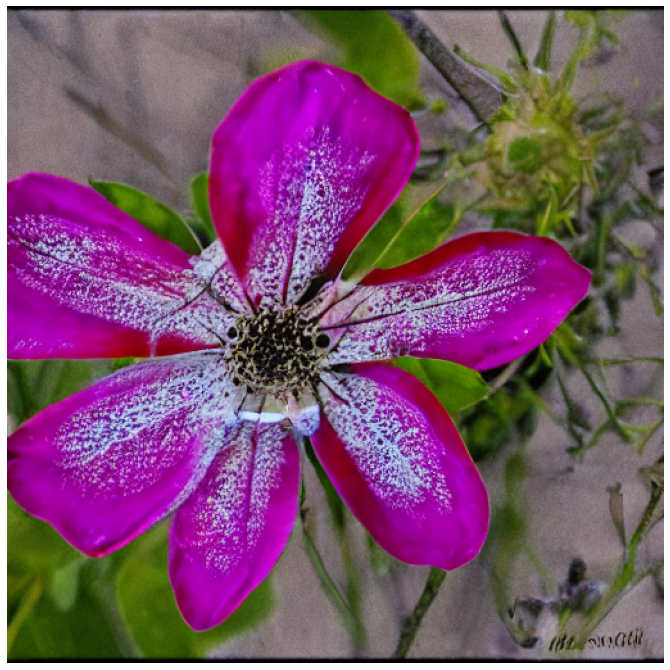

In [ ]:
#@title Show image
import gc
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in sorted(glob.glob('/content/InvokeAI/outputs/img-samples/*.png'), reverse=True):
    images.append(mpimg.imread(img_path))

images = images[:1]

plt.figure(figsize=(40,40))

columns = 3
for i, image in enumerate(images):
    ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.axis('off')
    plt.imshow(image)
    gc.collect()

!cp -r "/content/InvokeAI/outputs/img-samples/" "/content/drive/MyDrive/SDImages/Vic"